# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu. +
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte. +
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich: +
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: +
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.+
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

### **Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading data from `train.csv`

In [2]:
train_data = pd.read_csv('train2023.csv')

looking at the dataset

In [3]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


visualizing images based on label value (`images_per_value` images per label)

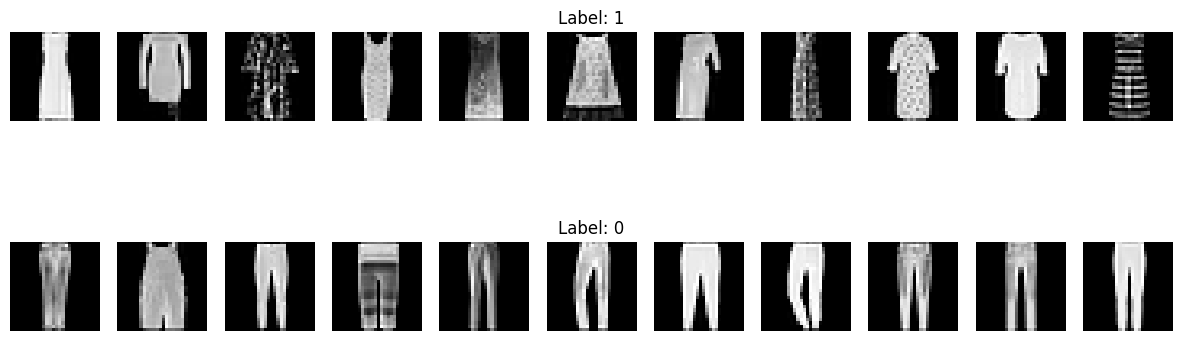

In [4]:
unique_labels = train_data['label'].unique()

images_per_label = 11

fig, axes = plt.subplots(nrows=len(unique_labels), ncols=images_per_label, figsize=(15,5))

for r, label in enumerate(unique_labels):
    label_data = train_data[train_data['label'] == label]

    for c, image in enumerate(label_data.iloc[:images_per_label, 1:].values):
        axes[r, c].imshow(image.reshape(28, 28), cmap='gray')
        axes[r, c].axis('off')
    axes[r, 5].set_title(f'Label: {label}')    

The dataset contains images of clothing items, each 28x28 pixels in size. There are only two unique label values: **0** and **1**, where **1** represents tops, and **0** represents pants. *(Note: The original dataset linked includes additional labels for other types of clothing.)*

The task is to train a model to predict the type of clothing with maximized accuracy, using the SVM, Naive Bayes, and LDA algorithms.

### **Data splitting**

Splitting data into features (Xdata) and target (ydata)

In [5]:
Xdata = train_data.drop(columns=['label']).values
ydata = train_data['label'].values

Splitting the dataset into training and testing data

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, train_size=0.6, random_state=333)

Splitting testing data in half for validation + testing

In [7]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, train_size=0.5, random_state=333)

Looking at sizes of created datasets

In [8]:
print(Xtrain.shape)
print(Xval.shape)

(1440, 784)
(480, 784)


### **Support Vector Machines (SVM)**

SVM is highly effective for high-dimensional data like images, as it separates classes using a hyperplane. It handles non-linear relationships well (with kernels like RBF) and is robust to overfitting, especially when scaled features are used. Its ability to work with complex boundaries makes it ideal for image-based classification.

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import ParameterGrid

We use a scaler for SVM because SVMs are sensitive to the scale of features. They rely on distances to determine the decision boundary, and unscaled features with larger magnitudes can dominate smaller ones, leading to biased results. Scaling ensures that all features contribute equally, improving accuracy, convergence, and performance.

In [10]:
scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.fit_transform(Xval)
Xtest_scaled = scaler.fit_transform(Xtest)

Tuning hyperparameters for SVM

In [11]:
param_grid_svm = {
    'C': [0.1, 1, 10, 20, 30, 50],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1e-3, 1e-2, 0.1, 1, 10],
    'degree': [2, 3, 5, 7]
}
param_comb_svm = ParameterGrid(param_grid_svm)

val_acc_svm = []
train_acc_svm = []

for params in param_comb_svm:
    if params['kernel'] != 'poly':
        params.pop('degree', None)
    svm = SVC(**params)
    svm.fit(Xtrain_scaled, ytrain)
    train_acc_svm.append(accuracy_score(ytrain, svm.predict(Xtrain_scaled)))
    val_acc_svm.append(accuracy_score(yval, svm.predict(Xval_scaled)))

In [12]:
best_params_svm = param_comb_svm[np.argmax(val_acc_svm)]

Using the best hyperparameters (best_params_svm) from a previous grid search to train an SVM model

In [13]:
best_svm = SVC(**best_params_svm)
best_svm.fit(Xtrain_scaled, ytrain)
y_train_pred_best_svm = best_svm.predict(Xtrain_scaled)
best_svm_score_train = accuracy_score(ytrain, y_train_pred_best_svm)

y_val_pred_best_svm = best_svm.predict(Xval_scaled)
best_svm_score_val = accuracy_score(yval, y_val_pred_best_svm)

In [14]:
print("Training data accuracy score: ", round(best_svm_score_train, 5))
print("Validation data accuracy score: ", round(best_svm_score_val, 5))

Training data accuracy score:  0.99861
Validation data accuracy score:  0.98125


### **Naive Bayes**

Naive Bayes is a simple yet fast algorithm, suitable for datasets with clear probabilistic patterns. It assumes feature independence, which might not hold in image data, but it can still work well when data is binarized (e.g., BernoulliNB for binary pixel values). It's less computationally expensive but may be less accurate than SVM for complex data.

In [15]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB

- **CategoricalNB (CNB)**: Used for categorical data; `min_categories=256` ensures it can handle up to 256 unique values per feature, such as pixel intensities in binarized form.  
- **BernoulliNB (BNB)**: Designed for binary data, making it suitable for binarized features where values are 0 or 1.  
- **MultinomialNB (MNB)**: Handles discrete, frequency-based data like counts, making it ideal for integer-valued features such as pixel intensities.  

In [16]:
cnb = CategoricalNB(min_categories=256)
mnb = MultinomialNB()           

In [17]:
cnb.fit(Xtrain, ytrain)
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [18]:
y_pred_cnb = cnb.predict(Xval)
accuracy_cnb = accuracy_score(yval, y_pred_cnb)

y_pred_mnb = mnb.predict(Xval)
accuracy_mnb = accuracy_score(yval, y_pred_mnb)

In [19]:
print("Validation data accuracy score for cnb: ", round(accuracy_cnb, 5))
print("Validation data accuracy score for mnb: ", round(accuracy_mnb, 5))

Validation data accuracy score for cnb:  0.92083
Validation data accuracy score for mnb:  0.93958


In [20]:
from sklearn.preprocessing import Binarizer

In [21]:
accuracy_binarized = 0 
threshold_binarized = 0

# accuracies_binarized = []

for threshold in range(256):
    binarizer = Binarizer(threshold=threshold)

    Xtrain_binarized = binarizer.fit_transform(Xtrain)
    Xval_binarized = binarizer.transform(Xval)

    bnb_binarized = BernoulliNB()
    bnb_binarized.fit(Xtrain_binarized, ytrain)

    y_pred_bnb_binarized = bnb_binarized.predict(Xval_binarized)

    accuracy_bnb = accuracy_score(yval, y_pred_bnb_binarized)
    # accuracies_binarized.append(accuracy_bnb)

    if accuracy_bnb > accuracy_binarized:
        accuracy_binarized = accuracy_bnb
        threshold_binarized = threshold

In [22]:
print("Best binarized BNB validation data accuracy score: ", accuracy_binarized)
print("Best threshold for binarization: ", threshold_binarized)

Best binarized BNB validation data accuracy score:  0.9625
Best threshold for binarization:  40


Binarizing data improved predictions because it simplified pixel intensity values into binary (0 or 1), aligning with BernoulliNB's assumption of binary features. This reduced noise, emphasized key patterns, and helped the model better distinguish between classes.

### **Linear Discriminant Analysis (LDA)**

LDA is suitable for datasets where classes are linearly separable. It reduces dimensionality while maximizing class separability, making it effective for structured datasets. However, for raw or high-dimensional image data, LDA may struggle compared to SVM unless preprocessing like PCA is applied to reduce dimensions first (which I will do next).

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

For a dataset of 28x28 pixel images, the `svd` solver is typically the best choice for LDA because it handles high-dimensional data efficiently without explicitly computing the covariance matrix. This makes it computationally faster and more stable, especially when the number of features (784) exceeds the number of samples. Other solvers like `lsqr` or `eigen` are less suited for such high-dimensional datasets, as they rely on covariance matrix computation, which is both time-consuming and prone to numerical instability.
So i will only use basic LDA solver (svd).

In [24]:
lda = LinearDiscriminantAnalysis()

# Fit LDA on the training data
lda.fit(Xtrain, ytrain)

# Predict on the training set
y_train_pred_lda = lda.predict(Xtrain)
train_accuracy_lda = accuracy_score(ytrain, y_train_pred_lda)

# Predict on the validation set
y_val_pred_lda = lda.predict(Xval)
val_accuracy_lda = accuracy_score(yval, y_val_pred_lda)

In [25]:
print("Training data accuracy score (LDA): ", round(train_accuracy_lda, 5))
print("Validation data accuracy score (LDA):  ", round(val_accuracy_lda, 5))

Training data accuracy score (LDA):  0.99306
Validation data accuracy score (LDA):   0.92292


### **PCA**

**Principal component analysis (PCA)** is perhaps the most common dimensionality reduction method. It is a form of feature extraction, which means it combines and transforms the dataset’s original features to produce new features, called principal components. Essentially, PCA *selects a subset of variables* from a model that together comprise the majority or all of the variance present in the original set of variables. PCA then projects data onto a new space defined by this subset of variables.

In [26]:
from sklearn.decomposition import PCA

##### **SVM**

This code performs hyperparameter tuning for an SVM model combined with PCA. It iterates through different combinations of SVM parameters (`C`, `kernel`, `gamma`, `degree`) and PCA components (`n_components`). For each combination, it applies PCA for dimensionality reduction and trains the SVM on the transformed data. The best parameter set is selected based on the highest validation accuracy, optimizing the model's performance.

In [27]:
param_grid_svm_pca = {
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1e-3, 1e-2, 0.1, 1],
    'degree': [2, 3, 5, 7],
    'n_components': [10, 20, 50, 100]
}

param_comb_svm_pca = ParameterGrid(param_grid_svm_pca)

best_score_pca_svm = 0
best_n_components_pca_svm = 0
best_params_pca_svm = {}

for params in param_comb_svm_pca:
    pca = PCA(n_components=params['n_components'])

    Xtrain_pca_svm = pca.fit_transform(Xtrain_scaled)
    Xval_pca_svm = pca.transform(Xval_scaled)
    if params['kernel'] == 'poly':
        svm = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'], degree=params['degree'])
    else:
        svm = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])
    svm.fit(Xtrain_pca_svm, ytrain)
    current_score = accuracy_score(yval, svm.predict(Xval_pca_svm))

    if current_score > best_score_pca_svm:
        best_score_pca_svm = current_score
        best_n_components_pca_svm = params['n_components']
        best_params_pca_svm = params

In [28]:
print("Best PCA SVM validation data accuracy score: ", round(best_score_pca_svm, 5))
print("Best PCA n_components for SVM: ", best_n_components_pca_svm)

Best PCA SVM validation data accuracy score:  0.98333
Best PCA n_components for SVM:  50


##### **Naive Bayes**

This code performs PCA-based dimensionality reduction and tunes the number of components (`n_components`) for a Gaussian Naive Bayes model. It iterates over different values of `n_components`, applies PCA to reduce the features of the training and validation data, then trains the GaussianNB model on the transformed data. The best number of PCA components is selected based on the highest validation accuracy.

In [29]:
best_n_components_gnb = 0
best_score_pca_gnb = 0

n_components = [10, 20, 30, 50, 75, 100, 120]

for n in n_components:
    pca = PCA(n_components=n)

    Xtrain_pca_gnb = pca.fit_transform(Xtrain)
    Xval_pca_gnb = pca.fit_transform(Xval)

    pca_gnb = GaussianNB()
    pca_gnb.fit(Xtrain_pca_gnb, ytrain)

    current_score = accuracy_score(yval, pca_gnb.predict(Xval_pca_gnb))

    if current_score > best_score_pca_gnb:
        best_score_pca_gnb = current_score
        best_n_components_gnb = n      

In [30]:
print("Best PCA GaussianNb validation data accuracy score: ", round(best_score_pca_gnb, 5))
print("Best PCA n_components for GaussianNB: ", best_n_components_gnb)  

Best PCA GaussianNb validation data accuracy score:  0.9375
Best PCA n_components for GaussianNB:  20


##### **LDA**

This code performs PCA for dimensionality reduction and tunes the number of components (`n_components`) for a Linear Discriminant Analysis (LDA) model. It iterates through different values of `n_components`, applies PCA to the training and validation data, trains the LDA model, and selects the number of components that yields the highest validation accuracy.

In [31]:
best_score_pca_lda = 0
best_n_components_lda = 0

for n in n_components:
    pca = PCA(n_components=n)

    Xtrain_pca_lda = pca.fit_transform(Xtrain)
    Xval_pca_lda = pca.fit_transform(Xval)

    pca_lda = LinearDiscriminantAnalysis()
    pca_lda.fit(Xtrain_pca_lda, ytrain)

    current_score = accuracy_score(yval, pca_lda.predict(Xval_pca_lda))

    if current_score > best_score_pca_lda:
        best_score_pca_lda = current_score
        best_n_components_lda = n

In [32]:
print("Best PCA LDA validation data accuracy score: ", round(best_score_pca_lda, 5))
print("Best PCA n_components for LDA: ", best_n_components_lda) 

Best PCA LDA validation data accuracy score:  0.9375
Best PCA n_components for LDA:  10


### **LLE**

In [33]:
from sklearn.manifold import LocallyLinearEmbedding


##### **SVM**

In [34]:
param_grid_svm_lle = {
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-2, 0.1, 1],
    'n_components': [10, 30, 50, 100]
}

param_comb_svm_lle = ParameterGrid(param_grid_svm_lle)

best_score_lle_svm = 0
best_n_components_lle_svm = 0

for params in param_comb_svm_lle:
    lle = LocallyLinearEmbedding(n_components=params['n_components'], n_neighbors=10)
    
    Xtrain_lle = lle.fit_transform(Xtrain_scaled)
    Xval_lle = lle.transform(Xval_scaled)
    
    svm = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])
    svm.fit(Xtrain_lle, ytrain)
    
    current_score = accuracy_score(yval, svm.predict(Xval_lle))
    if current_score > best_score_lle_svm:
        best_score_lle_svm = current_score
        best_n_components_lle_svm = params['n_components']

In [35]:
print("Best LLE SVM validation data accuracy score: ", round(best_score_lle_svm, 5))
print("Best LLE n_components for SVM: ", best_n_components_lle_svm)

Best LLE SVM validation data accuracy score:  0.96667
Best LLE n_components for SVM:  30


##### **Naive Bayes**

In [36]:
best_n_components_lle_gnb = 0
best_score_lle_gnb = 0

n_components = [10, 20, 30, 50, 75, 100, 120]

for n in n_components:
    lle = LocallyLinearEmbedding(n_components=n)

    Xtrain_lle_gnb = lle.fit_transform(Xtrain)
    Xval_lle_gnb = lle.transform(Xval)

    lle_gnb = GaussianNB()
    lle_gnb.fit(Xtrain_lle_gnb, ytrain)

    current_score = accuracy_score(yval, lle_gnb.predict(Xval_lle_gnb))

    if current_score > best_score_lle_gnb:
        best_score_lle_gnb = current_score
        best_n_components_lle_gnb = n

In [37]:
print("Best LLE GaussianNb validation data accuracy score: ", round(best_score_lle_gnb, 5))
print("Best LLE n_components for GaussianNB: ", best_n_components_lle_gnb)  

Best LLE GaussianNb validation data accuracy score:  0.97708
Best LLE n_components for GaussianNB:  10


##### **LDA**

In [38]:
best_score_lle_lda = 0
best_n_components_lle = 0

for n in n_components:
    lle = LocallyLinearEmbedding(n_components=n)

    Xtrain_lle_lda = lle.fit_transform(Xtrain)
    Xval_lle_lda = lle.transform(Xval)

    lle_lda = LinearDiscriminantAnalysis()
    lle_lda.fit(Xtrain_lle_lda, ytrain)

    current_score = accuracy_score(yval, lle_lda.predict(Xval_lle_lda))

    if current_score > best_score_lle_lda:
        best_score_lle_lda = current_score
        best_n_components_lle = n

In [39]:
# Print the results
print("Best LDA validation data accuracy score with LLE: ", best_score_lle_lda)
print("Best LLE n_components for LDA: ", best_n_components_lle)

Best LDA validation data accuracy score with LLE:  0.96875
Best LLE n_components for LDA:  10


### **Best model**

Choosing the best model based on validation data accuracy score

In [40]:
best_params = best_params_pca_svm
best_params

{'C': 20, 'degree': 3, 'gamma': 1, 'kernel': 'poly', 'n_components': 50}

In [41]:
# Apply the best PCA model with the chosen number of components
best_model_pca = PCA(n_components=best_params['n_components'])
best_model_pca.fit(Xtrain_scaled)

# Transform both the training and test data using the fitted PCA model
Xtrain_best_model = best_model_pca.transform(Xtrain_scaled)
Xtest_best_model = best_model_pca.transform(Xtest_scaled)

In [42]:
# Remove 'n_components' from the best_params dictionary
best_params1 = best_params
best_params1.pop('n_components', None)

# Use the best parameters for the SVM model
best_model_pca_svm = SVC(**best_params1)

# Fit the SVM model on the transformed training data
best_model_pca_svm.fit(Xtrain_best_model, ytrain)

# Evaluate the model's accuracy on the transformed test data
test_accuracy_best_model = accuracy_score(ytest, best_model_pca_svm.predict(Xtest_best_model))

In [43]:
print("Test accuracy of the best PCA-SVM model: ", test_accuracy_best_model)

Test accuracy of the best PCA-SVM model:  0.96875


In [44]:
evaluation_data = pd.read_csv('evaluate2023.csv')

In [45]:
evaluation_data.describe()

,ID,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,...,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,4799.500000,0.001667,0.001875,0.002604,0.007188,0.164271,0.403125,1.044687,2.590521,7.076354,...,65.327187,27.704792,10.220521,3.415417,1.504583,0.666042,0.183646,0.075104,0.029479,0.007500
std,2771.425626,0.163299,0.164568,0.174094,0.255883,2.650294,5.974822,10.133322,17.453677,27.827698,...,66.120584,50.256966,31.108111,17.749584,11.823659,7.301232,3.862455,2.562498,1.847805,0.555444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2399.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4799.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7199.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,116.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9599.000000,16.000000,16.000000,16.000000,16.000000,133.000000,202.000000,213.000000,255.000000,237.000000,...,255.000000,255.000000,255.000000,244.000000,215.000000,191.000000,154.000000,151.000000,172.000000,53.000000


In [46]:
X_evaluation = evaluation_data.drop('ID', axis=1)

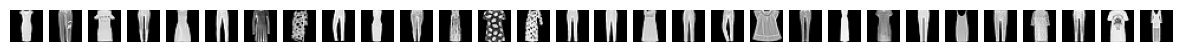

In [47]:
images_to_display = 30
fig, axes = plt.subplots(1, images_to_display, figsize=(15, 10))

# Loop through and plot each image
for i in range(images_to_display):
    image_data = X_evaluation.iloc[i].values
    image = image_data.reshape(28, 28)
    
    axes[i].imshow(image, cmap='gray')  # Plot the image
    axes[i].axis('off')

In [48]:
X_evaluation_scaled = scaler.transform(X_evaluation)

C:\Users\maryt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [49]:
X_evaluation_pca = best_model_pca.transform(X_evaluation_scaled)

In [50]:
y_pred_evaluation = best_model_pca_svm.predict(X_evaluation_pca)

In [51]:
results = pd.DataFrame({
    'ID': evaluation_data['ID'],
    'label': y_pred_evaluation
})

results.to_csv('results2023.csv', index=False)